In [ ]:
!pip install chart_studio
!pip install pandasgui
!pip install prophet
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from google.colab import auth
from google.cloud import bigquery
from prophet import Prophet
auth.authenticate_user()
print('Authenticated')

     |████████████████████████████████| 64 kB 1.7 MB/s 
     |████████████████████████████████| 208 kB 5.0 MB/s 
     |████████████████████████████████| 8.3 MB 41.8 MB/s 
     |████████████████████████████████| 317 kB 2.1 MB/s 
     |████████████████████████████████| 229 kB 67.2 MB/s 
     |████████████████████████████████| 99 kB 7.1 MB/s 
     |████████████████████████████████| 179 kB 50.0 MB/s 
     |████████████████████████████████| 59.9 MB 31 kB/s 
     |████████████████████████████████| 67.5 MB 31 kB/s 
  Created wheel for pandasgui: filename=pandasgui-0.2.12-py3-none-any.whl size=225410 sha256=88956782d201e29a55188d9bcf46a46752af3227295a00bc839d1205f313a89d
  Stored in directory: /root/.cache/pip/wheels/36/0a/11/8c541685a28719e6076c9fc233eef62305f5c9ffc471973148
  Created wheel for evdev: filename=evdev-1.4.0-cp37-cp37m-linux_x86_64.whl size=97556 sha256=daf87c62c9627c79e1015c4600590b58df815046c9e76164311a8f17b211c959
  Stored in directory: /root/.cache/pip/wheels/2e/1b/d7/59db56

In [ ]:
bqclient = bigquery.Client(project="GCP_PROJECT_ID")
query_string = """
BQ_QUERY
"""
job = bqclient.query(query_string)

df1 = job.result().to_dataframe()
df1.head()


In [ ]:
primary_goal = df1['event_name']=="Book A Viewing Complete"
print(primary_goal)

In [ ]:
df2 = df1[primary_goal]
df2.head()

In [ ]:
tx_user = pd.DataFrame(df2['UserID'].unique())
tx_user.columns = ['UserID']

In [ ]:
tx_max_purchase = df2.groupby('UserID').Time.max().reset_index()

In [ ]:
tx_max_purchase.columns = ['UserID','MaxBookingDate']
tx_max_purchase

,UserID,MaxBookingDate
0,1081585098.1626569522,2021-07-18 00:53:11.862645+00:00
1,1105980003.1624574011,2021-07-16 03:23:26.380363+00:00
2,1126263824.1624919293,2021-06-28 22:35:55.420223+00:00
3,1165720408.1626455611,2021-07-16 17:18:10.668493+00:00
4,1186506034.1624681524,2021-06-26 05:01:09.824563+00:00
5,1229195178.1626211372,2021-07-13 21:24:24.511825+00:00
6,1246738986.1624094125,2021-06-19 09:25:28.174743+00:00
7,1312624959.1626836024,2021-07-25 06:08:49.004136+00:00
8,1317149475.1624859168,2021-07-02 00:05:00.946309+00:00
9,1364104941.1624962554,2021-06-29 10:39:16.613301+00:00


In [ ]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxBookingDate'].max() - tx_max_purchase['MaxBookingDate']).dt.days

In [ ]:
tx_user = pd.merge(tx_user, tx_max_purchase[['UserID','Recency']], on='UserID')

In [ ]:
tx_user.head()

,UserID,Recency
0,1186506034.1624681524,29
1,400552345.1588984590,29
2,1779024626.1624503492,31
3,162542462.1624175020,35
4,189334476.1613774393,44


In [ ]:
tx_user.Recency.describe()

count    57.000000
mean     22.859649
std      13.611233
min       0.000000
25%      10.000000
50%      24.000000
75%      34.000000
max      45.000000
Name: Recency, dtype: float64

In [ ]:
plot = [go.Histogram(
    x=tx_user['Recency']
)]

plot_layout = go.Layout(title='Recency')
fig = go.Figure(data=plot, layout=plot_layout)
pyoff.iplot(fig)

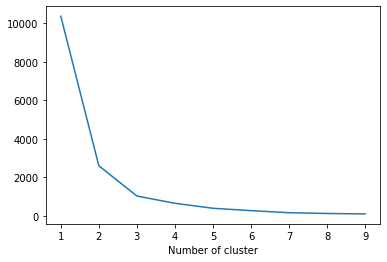

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [ ]:
tx_user

,UserID,Recency,RecencyCluster
0,1186506034.1624681524,29,1
1,400552345.1588984590,29,1
2,1779024626.1624503492,31,1
3,1552110218.1624592994,30,1
4,309758685.1624823378,28,1
5,1611591464.1624837070,28,1
6,822951405.1625100122,24,1
7,1364104941.1624962554,26,1
8,1126263824.1624919293,27,1
9,525936669.1624947674,26,1


In [ ]:
tx_frequency = df2.groupby('UserID').Time.count().reset_index()
tx_frequency.columns = ['UserID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='UserID')

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,36.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
1,15.0,2.0,0.000000,2.0,2.0,2.0,2.0,2.0
2,5.0,3.2,0.447214,3.0,3.0,3.0,3.0,4.0
3,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0


In [ ]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster']
tx_user.groupby('OverallScore')['Recency','Frequency'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency
OverallScore,,
0,38.153846,1.000000
1,27.750000,1.166667
2,17.090909,1.545455
3,9.625000,2.250000
4,10.500000,5.500000


In [ ]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [ ]:
# Revenue vs Frequency
tx_graph = tx_user.query("Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Traffic Prediction using Facebook Prophet

In [ ]:
bqclient = bigquery.Client(project="GCP_PROJECT_ID")
query_string = """
BQ_QUERY
"""
job_2 = bqclient.query(query_string)

df2 = job_2.result().to_dataframe()
df2.head()


,DateOnly,Users
0,2021-06-10,1106
1,2021-06-11,1291
2,2021-06-12,872
3,2021-06-13,920
4,2021-06-14,1168


In [ ]:
df2 = df2.rename(columns={'DateOnly':'ds','Users':'y'})
df2.head()

,ds,y
0,2021-06-10,1106
1,2021-06-11,1291
2,2021-06-12,872
3,2021-06-13,920
4,2021-06-14,1168


In [ ]:
m = Prophet()
m.fit(df2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=31)
future

,ds
0,2021-06-10
1,2021-06-11
2,2021-06-12
3,2021-06-13
4,2021-06-14
...,...
74,2021-08-23
75,2021-08-24
76,2021-08-25
77,2021-08-26


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-06-10,1018.999006,796.849660,1240.554021
1,2021-06-11,1006.013212,790.327279,1206.463229
2,2021-06-12,843.780333,642.436123,1045.781303
3,2021-06-13,919.198610,716.485551,1128.763715
4,2021-06-14,1086.165897,885.995801,1296.827740
...,...,...,...,...
74,2021-08-23,738.448850,525.183374,936.540218
75,2021-08-24,628.631978,427.684866,851.538331
76,2021-08-25,687.846823,474.478664,900.095938
77,2021-08-26,636.510245,432.051928,844.375482


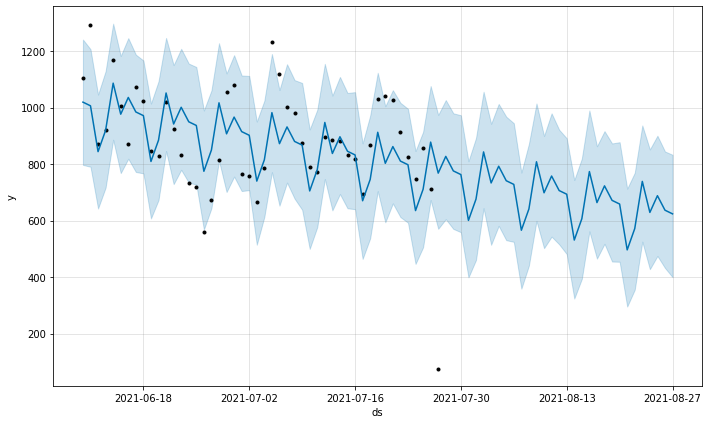

In [ ]:
fig1 = m.plot(forecast)